In [ ]:
### 1. Import Required Libraries

#We will start by importing the necessary Python libraries for data manipulation, visualization, and missing value analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

pd.set_option('display.max_columns', 200)
sns.set(style='whitegrid')



In [ ]:
### 2. Load Dataset

#we load the climate change dataset and check its shape (rows & columns) and preview the first few rows.

df = pd.read_csv('/content/climate_change_dataset.csv')
print("Rows,Cols:", df.shape)
df.head()



Rows,Cols: (1000, 10)


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
### 3. Initial Exploration

# Check column names
# View dataset information (`dtypes`, nulls, memory usage)
# Get descriptive statistics for all columns
print(df.columns.tolist())
df.info()
df.describe(include='all').T

['year', 'country', 'avg_temperature_°c', 'co2_emissions_tons/capita', 'sea_level_rise_mm', 'rainfall_mm', 'population', 'renewable_energy_pct', 'extreme_weather_events', 'forest_area_pct', 'co2_per_renewable', 'resilience_index']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1000 non-null   Int64  
 1   country                    1000 non-null   object 
 2   avg_temperature_°c         1000 non-null   float64
 3   co2_emissions_tons/capita  1000 non-null   float64
 4   sea_level_rise_mm          1000 non-null   float64
 5   rainfall_mm                1000 non-null   int64  
 6   population                 1000 non-null   int64  
 7   renewable_energy_pct       1000 non-null   float64
 8   extreme_weather_events     1000 non-null   int64  
 9   forest_area_pct            1000 non-null  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,1000.0,<NA>,<NA>,<NA>,2011.432,7.147199,2000.0,2005.0,2012.0,2018.0,2023.0
country,1000,15,Indonesia,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_temperature_°c,1000.0,NaN,NaN,NaN,19.8831,8.542897,5.0,12.175,20.1,27.225,34.9
co2_emissions_tons/capita,1000.0,NaN,NaN,NaN,10.4258,5.614665,0.5,5.575,10.7,15.4,20.0
sea_level_rise_mm,1000.0,NaN,NaN,NaN,3.0096,1.146081,1.0,2.0,3.0,4.0,5.0
rainfall_mm,1000.0,NaN,NaN,NaN,1738.761,708.976616,501.0,1098.75,1726.0,2362.5,2999.0
population,1000.0,NaN,NaN,NaN,705383046.613,409390996.884411,3660891.0,343624166.0,713116635.5,1073868037.25,1397016073.0
renewable_energy_pct,1000.0,NaN,NaN,NaN,27.3005,12.970808,5.1,16.1,27.15,38.925,50.0
extreme_weather_events,1000.0,NaN,NaN,NaN,7.291,4.422655,0.0,3.0,8.0,11.0,14.0
forest_area_pct,1000.0,NaN,NaN,NaN,40.572,17.398998,10.1,25.6,41.15,55.8,70.0


In [ ]:
### 4. Clean Column Names

#We simplify column names by:
# Converting to lowercase
# Replacing spaces with underscores
# Removing brackets and special characters

df.columns = [c.strip().lower().replace(' ', '_').replace('(', '').replace(')', '').replace('%','pct') for c in df.columns]
print(df.columns)






Index(['year', 'country', 'avg_temperature_°c', 'co2_emissions_tons/capita',
       'sea_level_rise_mm', 'rainfall_mm', 'population',
       'renewable_energy_pct', 'extreme_weather_events', 'forest_area_pct',
       'co2_per_renewable', 'resilience_index'],
      dtype='object')


In [ ]:

### 5. Convert Data Types

# Convert `year` column to integer
# Identify numeric columns relevant for climate analysis (temperature, CO2, sea levels, rainfall, population, renewables, etc.)
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

    numeric_cols = [c for c in df.columns if any(keyword in c for keyword in ['temp','co2','sea','rain','population','renew','extreme','forest'])]
    numeric_cols


year                         0
country                      0
avg_temperature_°c           0
co2_emissions_tons/capita    0
sea_level_rise_mm            0
rainfall_mm                  0
population                   0
renewable_energy_pct         0
extreme_weather_events       0
forest_area_pct              0
dtype: int64
Duplicates: 0


<Axes: >

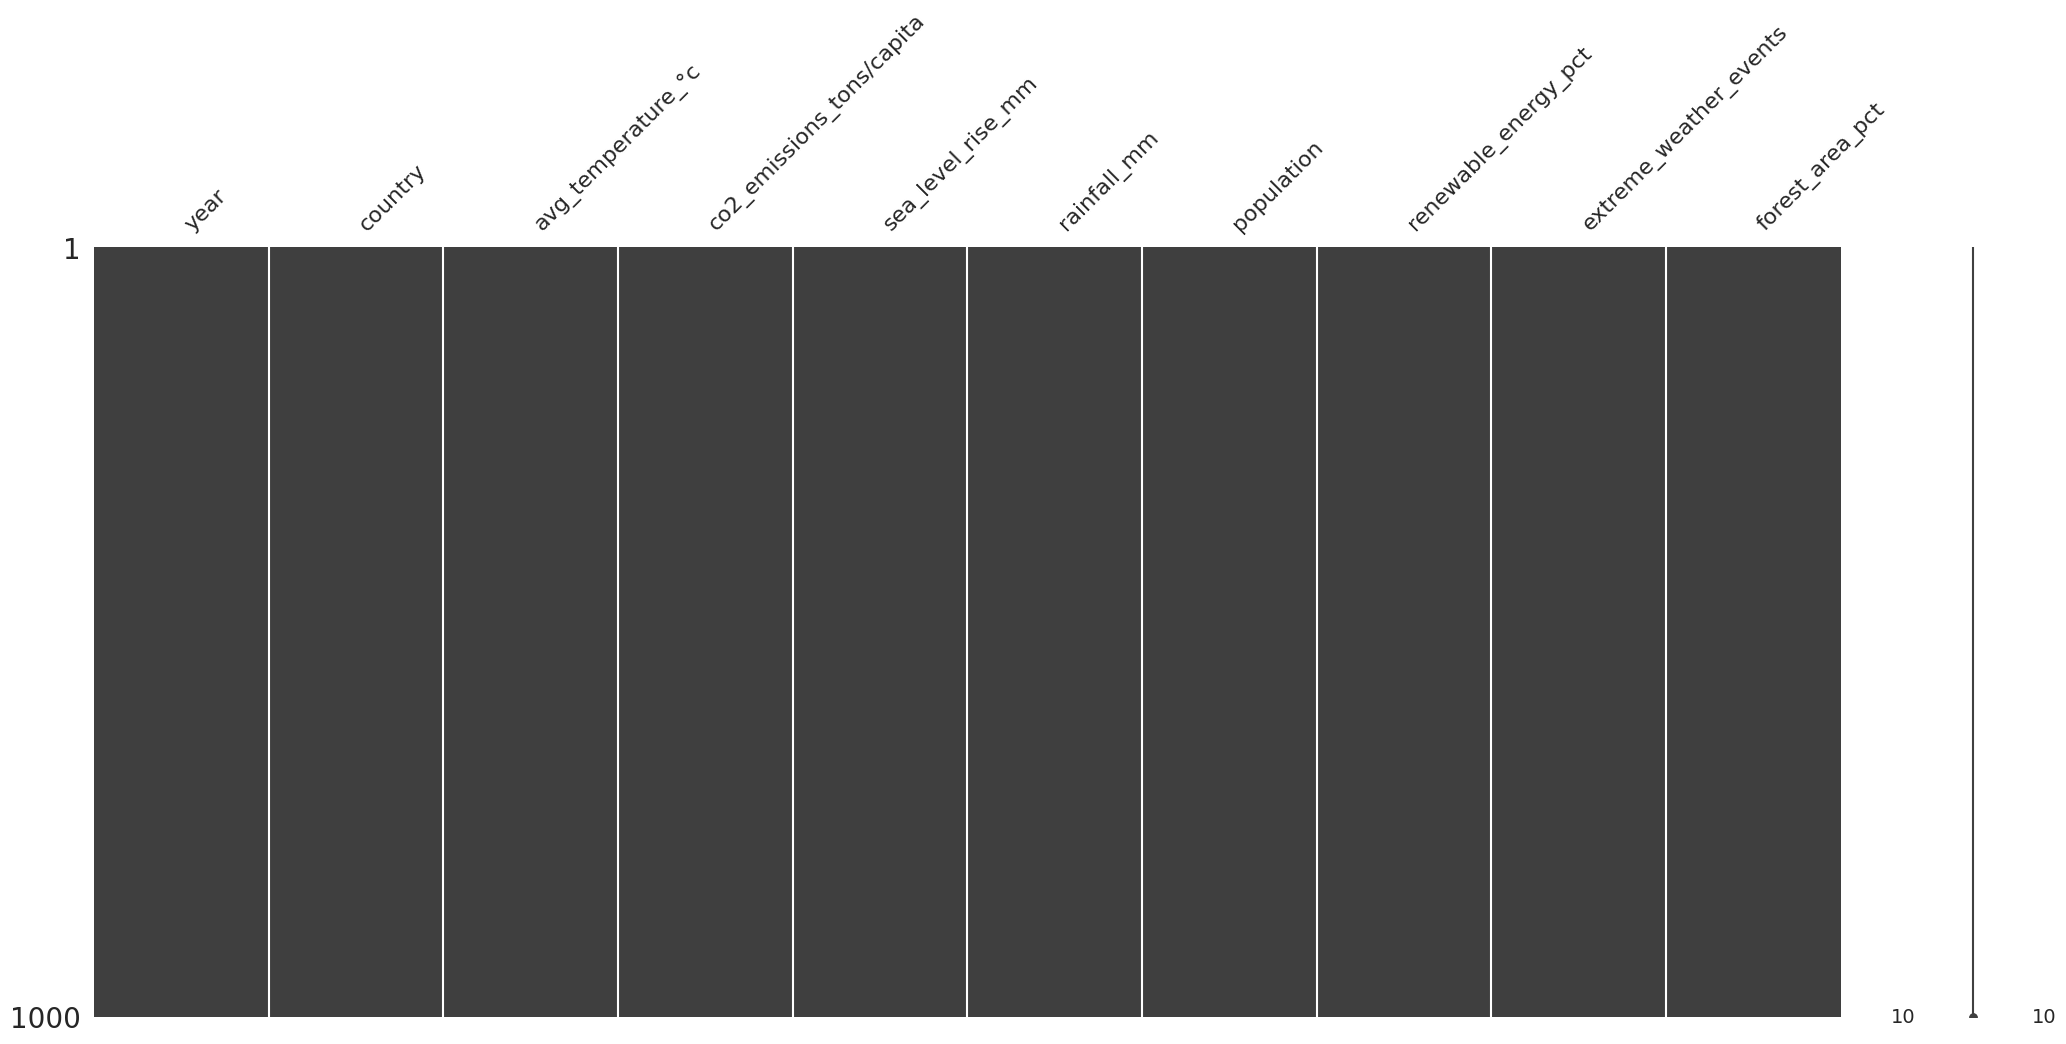

In [ ]:
### 6. Missing Value Analysis
#We check missing values and duplicates. Then, visualize missingness using **Missingno**.

# missing counts
print(df.isna().sum().sort_values(ascending=False).head(20))

# duplicates
print("Duplicates:", df.duplicated().sum())

# visual
msno.matrix(df)


In [ ]:
### 7. Data Cleaning

# Drop rows with missing `country` or `year`
# Convert numeric columns to numeric
# Impute missing values with **per-country median** first, then **global median**

df_clean = df.copy()

# drop rows missing country or year
df_clean = df_clean.dropna(subset=['country','year'])

# convert numeric columns to numbers, impute per-country median then global median
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[col] = df_clean.groupby('country')[col].transform(lambda x: x.fillna(x.median()))
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Check missing now
print(df_clean[numeric_cols].isna().sum())


avg_temperature_°c           0
co2_emissions_tons/capita    0
sea_level_rise_mm            0
rainfall_mm                  0
population                   0
renewable_energy_pct         0
extreme_weather_events       0
forest_area_pct              0
dtype: int64


In [ ]:
### 8. Save Cleaned Dataset

#We save the cleaned dataset as `climate_cleaned.csv` for further analysis.

df_clean.to_csv('climate_cleaned.csv', index=False)


In [ ]:
###Exploratory Data Analysis (EDA)

#Q1)Energy Mix Efficiency
#Which countries achieve the lowest CO₂ emissions per capita for every % of renewable adoption?

df['co2_per_renewable'] = df['co2_emissions_tons/capita'] / (df['renewable_energy_pct'] + 1e-5)
efficiency = df.groupby('country')['co2_per_renewable'].mean().reset_index().sort_values('co2_per_renewable')

fig = px.bar(efficiency.head(15), x='country', y='co2_per_renewable',
             title='Top 15 Efficient Countries: Low CO₂ per Renewable %')
fig.show()

In [ ]:
#Q2)Forest & Energy Balance
#Do higher forest cover countries also adopt renewables?

country_avg = df.groupby('country')[['forest_area_pct','renewable_energy_pct']].mean().reset_index()

fig = px.scatter(country_avg, x='forest_area_pct', y='renewable_energy_pct',
                 hover_name='country', trendline='ols',
                 title='Forest Cover vs Renewable Energy Adoption')
fig.show()



In [ ]:
#Q3)Population-Adjusted Emissions (Decoupling)
#Which countries grow population without proportional CO₂ growth?

yearly = df.groupby(['country','year'])[['population','co2_emissions_tons/capita']].sum().reset_index()
yearly['emissions_per_capita'] = yearly['co2_emissions_tons/capita'] / yearly['population']

fig = px.line(yearly, x='year', y='emissions_per_capita', color='country',
              title='Population vs CO₂ per Capita (Decoupling Check)')
fig.show()

In [ ]:
#Q4)Temperature vs Extreme Events
#Does +1°C impact events differently across continents?

country_avg = df.groupby(['country','year'])[['avg_temperature_°c','extreme_weather_events']].mean().reset_index()

fig = px.scatter(country_avg, x='avg_temperature_°c', y='extreme_weather_events',
                 color='country', trendline='ols',
                 title='Temperature vs Extreme Events by Country')
fig.show()

In [ ]:
#Q5)Sea Level vs Population Risk
#Which coastal nations are most at risk?
risk = df.groupby('country')[['sea_level_rise_mm','population']].mean().reset_index()
risk['risk_index'] = risk['sea_level_rise_mm'] * risk['population']

fig = px.bar(risk.sort_values('risk_index',ascending=False).head(15),
             x='country', y='risk_index',
             title='Top 15 Coastal Nations at Risk')
fig.show()


In [ ]:
#Q6)Rainfall Variability
#Which regions face the most unpredictable rainfall?
rain_var = df.groupby('country')['rainfall_mm'].std().reset_index().sort_values('rainfall_mm',ascending=False)

fig = px.bar(rain_var.head(15), x='country', y='rainfall_mm',
             title='Top 15 Countries with Most Variable Rainfall')
fig.show()


In [ ]:
#Q7)Emission Inequality Index
#How unequal are global CO₂ emissions?
total_emissions = df.groupby('country')['co2_emissions_tons/capita'].sum().reset_index()
total_emissions = total_emissions.sort_values('co2_emissions_tons/capita',ascending=False)
total_emissions['cumulative_share'] = total_emissions['co2_emissions_tons/capita'].cumsum() / total_emissions['co2_emissions_tons/capita'].sum()

fig = px.line(total_emissions, x=range(len(total_emissions)), y='cumulative_share',
              title='Global CO₂ Emission Inequality Curve')
fig.show()

In [ ]:
#Q8)Historical Responsibility vs Renewables
#Do historical emitters act more on renewables?
hist = df.groupby('country')[['co2_emissions_tons/capita','renewable_energy_pct']].mean().reset_index()

fig = px.scatter(hist, x='co2_emissions_tons/capita', y='renewable_energy_pct',
                 hover_name='country', trendline='ols',
                 title='Historical CO₂ vs Renewable Adoption')
fig.show()

In [ ]:
#Q9)Trade-off Analysis
#Do growing economies cut forests or slow renewables?
tradeoff = df.groupby('country')[['population','forest_area_pct','renewable_energy_pct']].mean().reset_index()

fig = px.scatter(tradeoff, x='population', y='forest_area_pct', size='renewable_energy_pct',
                 hover_name='country',
                 title='Population vs Forests (Bubble = Renewables)')
fig.show()



In [ ]:
#10)Climate Resilience Index (CRI)
#Who is most resilient vs vulnerable?
df['resilience_index'] = (df['renewable_energy_pct'] + df['forest_area_pct']) - \
                         (df['co2_emissions_tons/capita']/1e6 + df['extreme_weather_events'])

resilience = df.groupby('country')['resilience_index'].mean().reset_index()

fig = px.bar(resilience.sort_values('resilience_index',ascending=False).head(15),
             x='country', y='resilience_index',
             title='Top 15 Climate Resilient Countries')
fig.show()